## RNN for IMDB

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, TimeDistributed, LSTM
from tensorflow.keras import utils

### Data Preprocessing

In [ ]:
# sample text
sample = "hihello"

char_set = list(set(sample))  # id -> char ['i', 'l', 'e', 'o', 'h']
char_dic = {w: i for i, w in enumerate(char_set)}

x_str = sample[:-1]
y_str = sample[1:]

data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print(x_str, y_str)

hihell ihello


### Step 1. Data

In [ ]:
x = [char_dic[c] for c in x_str]  # char to index
y = [char_dic[c] for c in y_str]  # char to index

# One-hot encoding
x = utils.to_categorical(x, num_classes=num_classes)
# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
print(x.shape)

# One-hot encoding
y = utils.to_categorical(y, num_classes=num_classes)
# time steps
y = np.reshape(y, (-1, len(y), data_dim))
print(y.shape)

(1, 6, 5)
(1, 6, 5)


### Step 2. LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(
    timesteps, data_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes,activation='softmax')))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            68608     
_________________________________________________________________
time_distributed (TimeDistri (None, 6, 5)              645       
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

### Step 4. Train the model

In [ ]:
history=model.fit(x, y, epochs=100, verbose=2)

Epoch 1/100
1/1 - 3s - loss: 1.6144 - accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 1.5767 - accuracy: 0.3333
Epoch 3/100
1/1 - 0s - loss: 1.5483 - accuracy: 0.3333
Epoch 4/100
1/1 - 0s - loss: 1.5213 - accuracy: 0.3333
Epoch 5/100
1/1 - 0s - loss: 1.4935 - accuracy: 0.3333
Epoch 6/100
1/1 - 0s - loss: 1.4641 - accuracy: 0.3333
Epoch 7/100
1/1 - 0s - loss: 1.4324 - accuracy: 0.3333
Epoch 8/100
1/1 - 0s - loss: 1.3981 - accuracy: 0.3333
Epoch 9/100
1/1 - 0s - loss: 1.3611 - accuracy: 0.3333
Epoch 10/100
1/1 - 0s - loss: 1.3218 - accuracy: 0.3333
Epoch 11/100
1/1 - 0s - loss: 1.2807 - accuracy: 0.3333
Epoch 12/100
1/1 - 0s - loss: 1.2387 - accuracy: 0.3333
Epoch 13/100
1/1 - 0s - loss: 1.1967 - accuracy: 0.5000
Epoch 14/100
1/1 - 0s - loss: 1.1560 - accuracy: 0.5000
Epoch 15/100
1/1 - 0s - loss: 1.1174 - accuracy: 0.5000
Epoch 16/100
1/1 - 0s - loss: 1.0811 - accuracy: 0.5000
Epoch 17/100
1/1 - 0s - loss: 1.0469 - accuracy: 0.5000
Epoch 18/100
1/1 - 0s - loss: 1.0146 - accuracy: 0.5000
E

### Step 5. Test the Model

In [ ]:
predictions = model.predict(x, verbose=2)

for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

1/1 - 0s
[[8.0752887e-02 4.1759837e-01 2.5946143e-01 1.5795068e-01 8.4236667e-02]
 [3.3152699e-03 4.3203391e-02 8.6290175e-01 7.5535901e-02 1.5043705e-02]
 [3.2933542e-05 1.2968823e-04 2.3369266e-02 9.7070336e-01 5.7648206e-03]
 [1.6008597e-05 5.7922087e-08 1.8139786e-05 4.8306938e-03 9.9513513e-01]
 [2.1013110e-03 1.0230170e-08 5.0496402e-07 6.8694795e-04 9.9721128e-01]
 [9.9837744e-01 9.7034771e-09 2.7373529e-08 1.0103303e-05 1.6124508e-03]]
[2 1 2 3 4 4] hihell
[1 2 3 4 4 0] ihello


### Plot the Training Accuracy and Loss

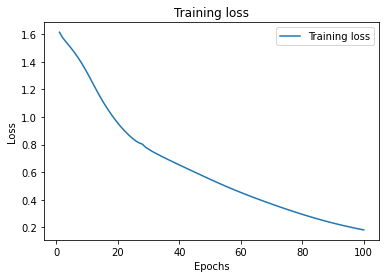

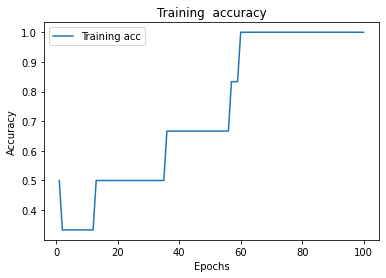

In [ ]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ?쁞o?숇뒗 ?뚮????먯쓣 ?섎??⑸땲??
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 洹몃옒?꾨? 珥덇린?뷀빀?덈떎
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()